# Caracteristicas

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

fileName = 's17.mat'
#db = sio.loadmat(ruta+fileName)
db = sio.loadmat(fileName)

### Dataset description

La base de datos se le removieron los 3 segundos iniciales de acondicionamiento. El arreglo X contiene todas las respuestas emocionales de las señales biológicas, para 40 videos diferentes. El arreglo se organiza de la forma

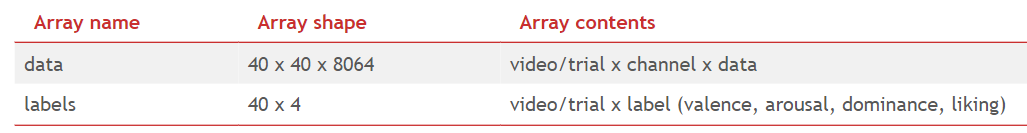

La siguiente tabla muestra el diseño de canales y el preprocesamiento realizado:

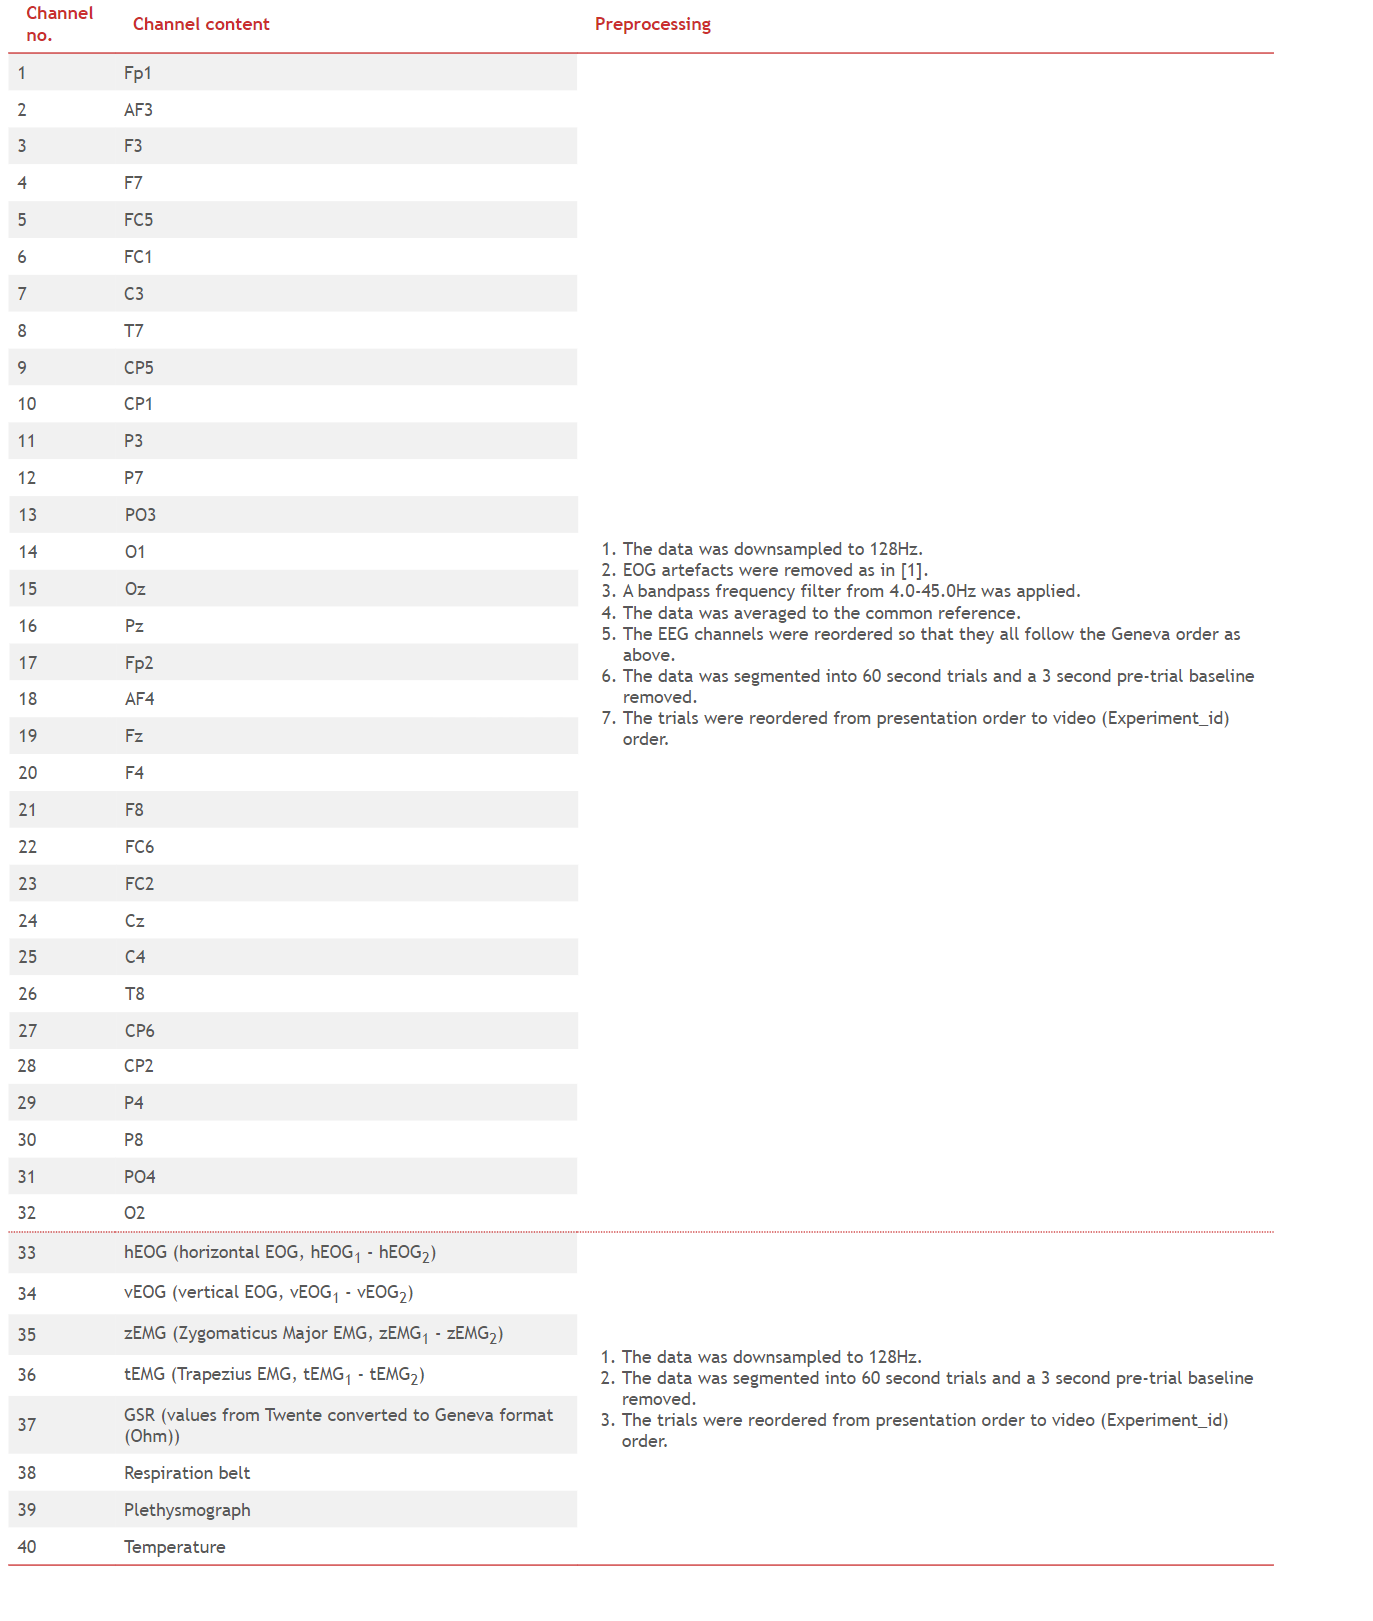

In [2]:
X = db['data']

## Caracteristicas temperatura de la piel

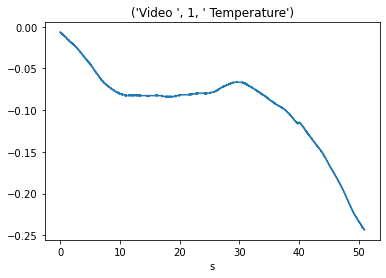

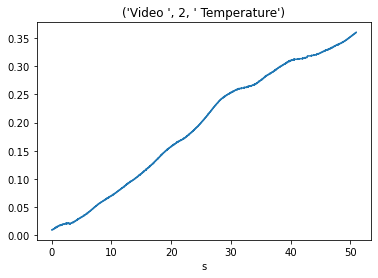

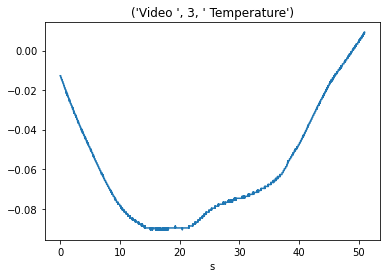

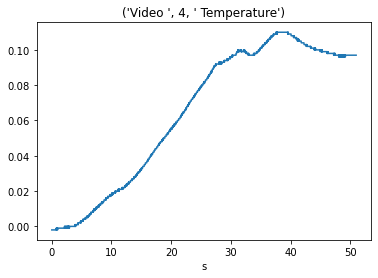

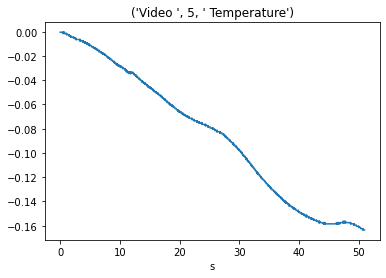

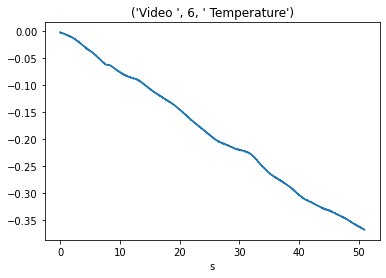

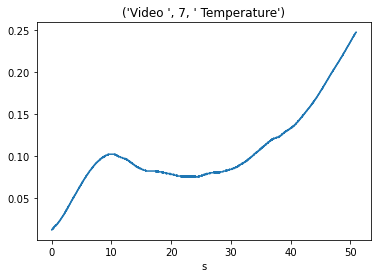

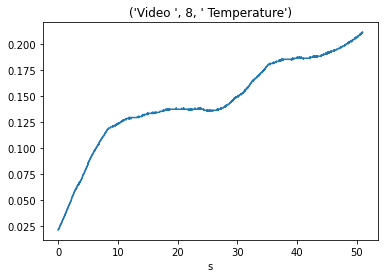

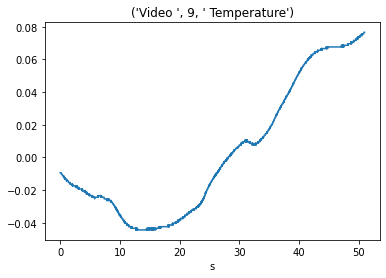

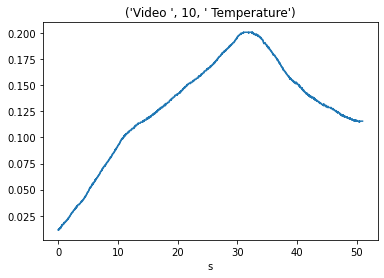

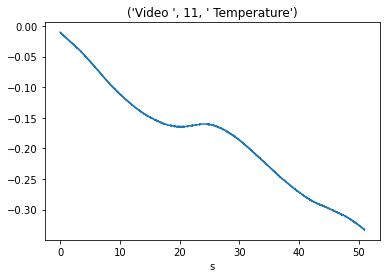

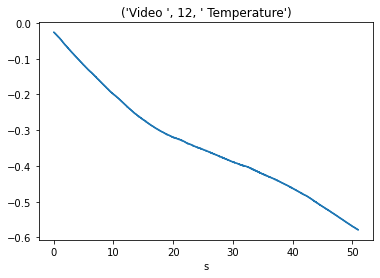

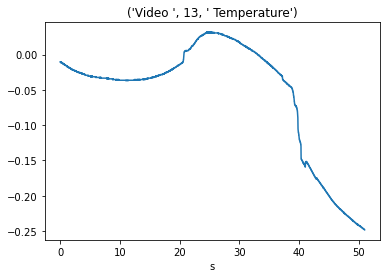

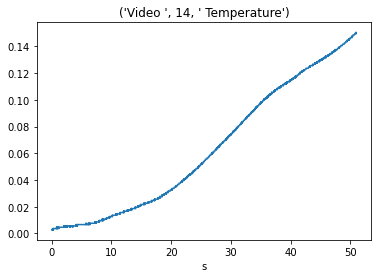

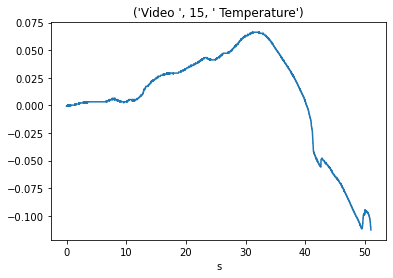

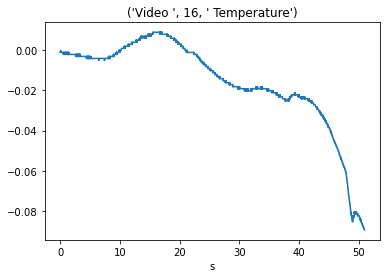

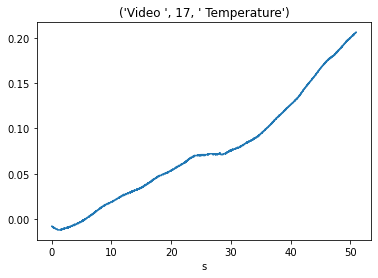

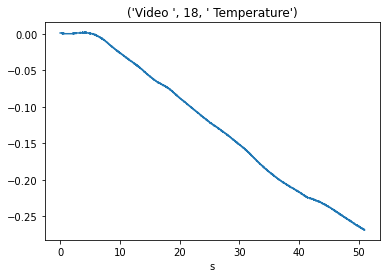

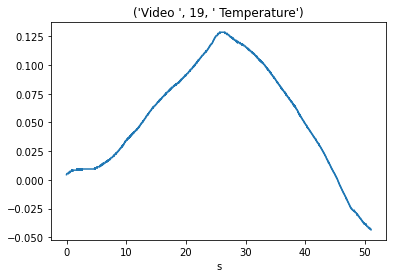

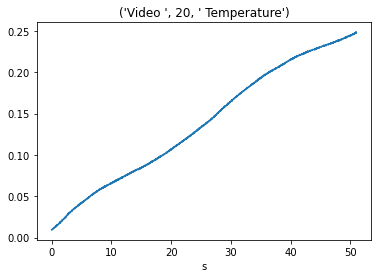

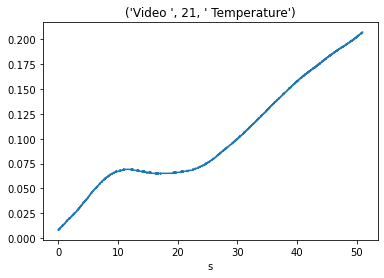

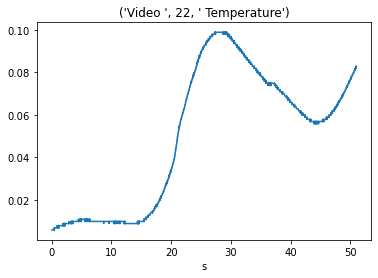

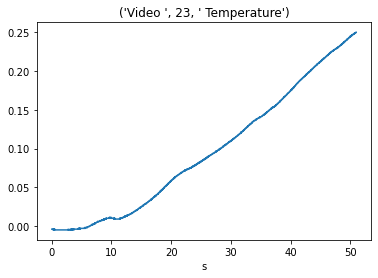

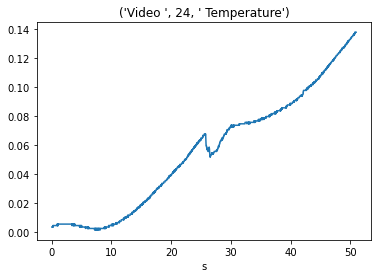

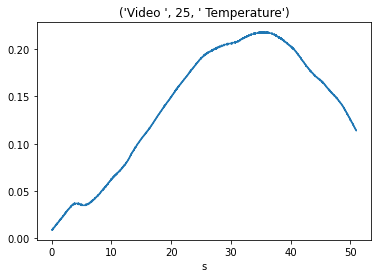

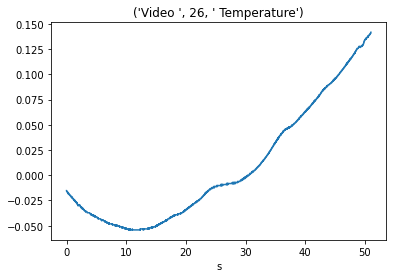

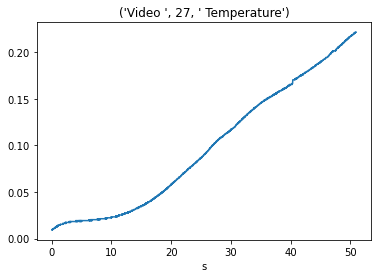

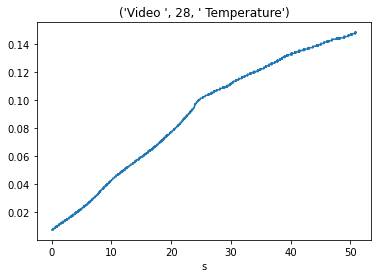

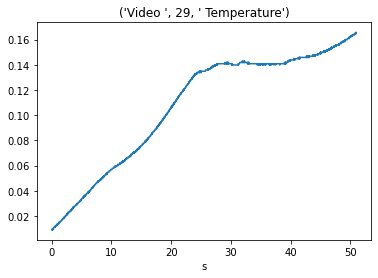

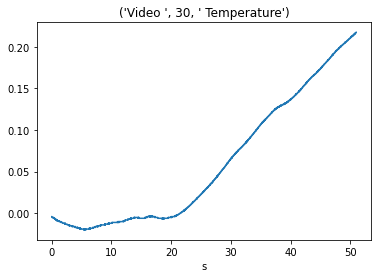

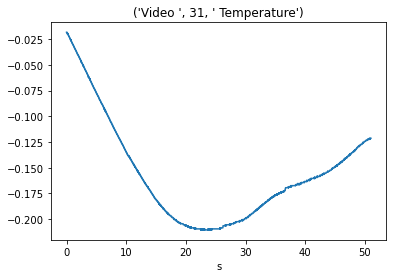

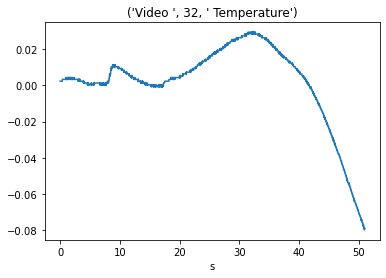

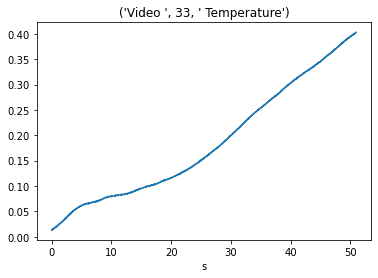

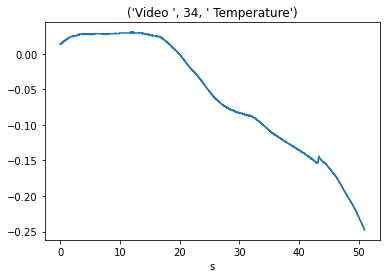

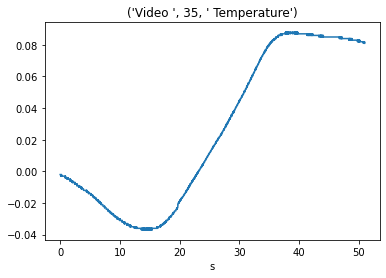

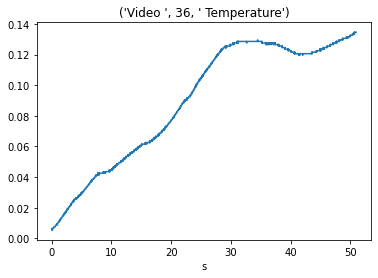

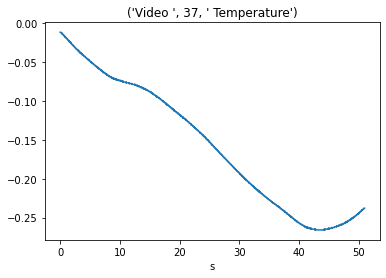

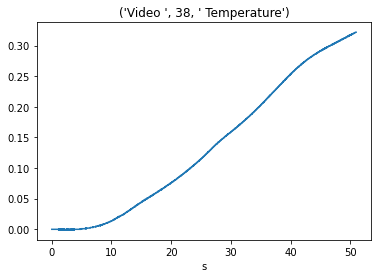

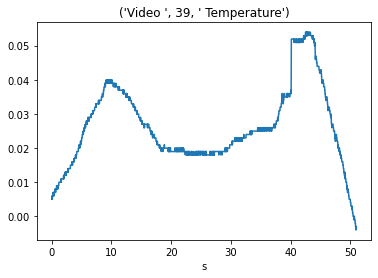

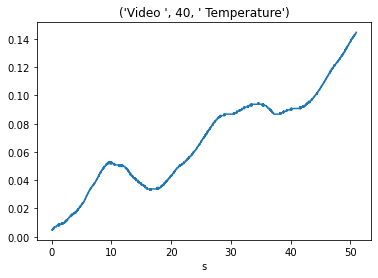

In [3]:
#trial = 15 # video u observación 

for trial in range(40):
    channel = 40 # canal de la señal fisiológica
    Temperature = X[trial,channel-1,:] # : Saca toda la info
    #print(Temperature.shape)
    ts = len(Temperature)/128.
    time = np.linspace(0,ts,len(Temperature))
    fortitle = ('Video ',  trial+1, ' Temperature') 
    
    plt.plot(time,Temperature)
    plt.title(fortitle)
    #plt.ylabel('uV')
    plt.xlabel('s')
    plt.show()

In [4]:
# AVERAGE

# Average per video
for trial in range(40):
    channel = 40 # canal de la señal fisiológica
    Temperature = X[trial,channel-1,:] # : Saca toda la info
    #print(Temperature.shape)
    average = np.average(Temperature)
    #fortitle = 'Video ', trial+1, 'AverageTemp= ', average
    print ('Video ', trial+1, 'AverageTemp= ', average)

# Total average
Temperature=[] 
for trial in range(40):
    channel = 40 # canal de la señal fisiológica
    Temperature.extend(X[trial,channel-1,:]) 
print('\n',np.array(Temperature).shape)
average = np.average(Temperature)
#fortitle = 'Video ', trial+1, 'AverageTemp= ', average
print ('La temperatura promedio durante toda la prueba fue ',average)

Video  1 AverageTemp=  -0.09477360163730016
Video  2 AverageTemp=  0.1942260648827063
Video  3 AverageTemp=  -0.05932889655317279
Video  4 AverageTemp=  0.06476111860482729
Video  5 AverageTemp=  -0.08564320393912178
Video  6 AverageTemp=  -0.18870698732632624
Video  7 AverageTemp=  0.10604704785248924
Video  8 AverageTemp=  0.14482167349834557
Video  9 AverageTemp=  0.002866691204037227
Video  10 AverageTemp=  0.12926396846108426
Video  11 AverageTemp=  -0.1826987922635723
Video  12 AverageTemp=  -0.33921976436281054
Video  13 AverageTemp=  -0.054381656031378574
Video  14 AverageTemp=  0.06314870054292758
Video  15 AverageTemp=  0.007813625357207227
Video  16 AverageTemp=  -0.015807089096107556
Video  17 AverageTemp=  0.07555203423931023
Video  18 AverageTemp=  -0.1243859672478028
Video  19 AverageTemp=  0.054805057468054544
Video  20 AverageTemp=  0.1385961098975816
Video  21 AverageTemp=  0.10099640792032674
Video  22 AverageTemp=  0.049846174938499445
Video  23 AverageTemp=  0.0958

In [5]:
# Average of its derivative
Temperature = [ ]

for trial in range(40):
    channel = 40 # canal de la señal fisiológica
    Temperature = X[trial,channel-1,:] # : Saca toda la info
    
    derivate1=np.diff(Temperature)
    print (derivate1)
    #average1 = np.average(derivate)
    #print ('Video ', trial+1, 'AverageDiff= ', average1)
    
    ####################Con indice de cambio##########################
    #Ts = 1/128
    #Ts = 1/len(Temperature)
    #print(len(Temperature))
    #print('\nTs= ', Ts)
    
    #derivate = np.diff(Temperature)/Ts
    #print (derivate)
    #print(Temperature.shape)
    #average = np.average(derivate)
    #fortitle = 'Video ', trial+1, 'AverageTemp= ', average
    #print ('Video ', trial+1, 'AverageDiff= ', average)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[ 0.          0.          0.         ... -0.00099999  0.00099999
  0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[-0.00099999  0.          0.         ...  0.          0.
  0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[ 0.          0.          0.         ...  0.         -0.00099999
  0.        ]
[ 0.          0.          0.         ... -0.00099999  0.
 -0.00099999]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[ 0.          0.          0.00099999 ...  0.00099999 -0.00099999
  0.        ]
[ 0.          0.          0.         ... -0.00099999  0.00099999
  0.        ]
[0. 0. 0. ... 0. 0. 0.]
[ 0.          0.          0.         ...  0.          0.
 -0.00099999]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[ 0.          0.         -0.00099999 ..

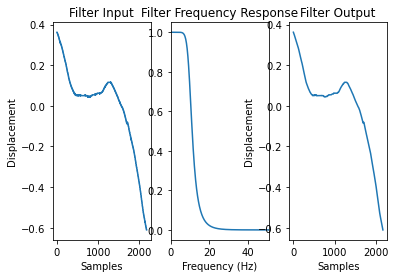

In [6]:
# spectral power in the bands ([0-0.1]Hz, [0.1-0.2]Hz)

import scipy.signal


Temperature = X[0,39,:] # : Saca toda la info

fs=128/3
fc = 10
Wc = (2*np.pi*fc)/128  #Normalizacion de Fc1


canal_normalizado = (Temperature - np.mean(Temperature))/float(max(abs(Temperature)))
canal_re= np.zeros(int(len(canal_normalizado)/3))
for i in range(int(len(canal_normalizado)/3)):
    canal_re[i]=canal_normalizado[i*3]


buffer = canal_re


#buffer = Temperature
sampleRange=np.linspace(0,ts,len(Temperature))

#b, a = scipy.signal.butter(5, 1.5625*10**-3, btype='lowpass', analog=False)

b, a = scipy.signal.butter(5, 0.156, btype='lowpass', analog=False)

# b = HNum_IIR, a = HDen_IIR numerador y denominador de la funcion de transferencia

#buffer_fil = scipy.signal.lfilter(b, a, buffer) # ----->>> OJO CON ESTA FUNCION lfilter
buffer_fil = scipy.signal.filtfilt(b,a,buffer)
    
# Calculate our frequency response
angularFreq, response = scipy.signal.freqz(b, a)


plt.subplot(1, 3, 1)
plt.plot(buffer)
#plt.ylim(bottom=-1, top=1)
plt.title("Filter Input")
plt.xlabel("Samples")
plt.ylabel("Displacement")

# Plot output and frequency response
plt.subplot(1, 3, 2)
plt.plot(0.5 * 128 * angularFreq / np.pi, np.abs(response))
plt.xlim(0, len(Temperature) / 128)
plt.title("Filter Frequency Response")
plt.xlabel("Frequency (Hz)")

plt.subplot(1, 3, 3)
plt.plot(buffer_fil)
#plt.xlim(0, len(Temperature) / 128)
plt.title("Filter Output")
plt.xlabel("Samples")
plt.ylabel("Displacement")
    


plt.show()

In [7]:
#########################################################################3
##########################################################################33
###################################################33
Temperature = X[0,39,:] # : Saca toda la info

fs= 128
print("Duration: {0}s".format(len(Temperature) / fs))

def normalize_signal(senal):
    senal = senal / np.max(np.abs(senal))
    return senal

Duration: 51.0s


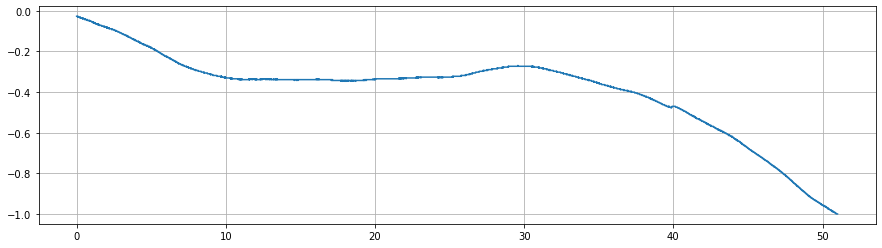

In [8]:
Temperature = normalize_signal(Temperature)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(Temperature) / fs, num=len(Temperature)), Temperature)
plt.grid(True)

In [9]:
from scipy.signal import get_window
import scipy.fftpack as fft


def frame_signal(senal, FFT_size=2048, hop_size=10, sample_rate=44100):
    # hop_size in ms
    
    senal = np.pad(senal, int(FFT_size / 2), mode='reflect')        # Padding 
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(senal) - FFT_size) / frame_len) + 1        # Aqui se define el recorrido de los frames, 
                #antes se definia que se queria un traslape de 50 o 75% ahora se calcula dependiendo de los tamanos
        
    frames = np.zeros((frame_num,FFT_size))                         # Matriz de frames
    
    for n in range(frame_num):
        frames[n] = senal[n*frame_len:n*frame_len+FFT_size]
    
    return frames

hop_size = 15 #ms PILAS con este parametro recordar de enventanado
FFT_size = 2048 # Esto teniendo en cuenta la duracion del audio 

Temperature_framed = frame_signal(Temperature, FFT_size=FFT_size, hop_size=hop_size, sample_rate=fs)
print("Framed signal shape: {0}".format(Temperature_framed.shape))

#######################################################

window = get_window("hann", FFT_size, fftbins=True) # VENTANA


Framed signal shape: (3265, 2048)


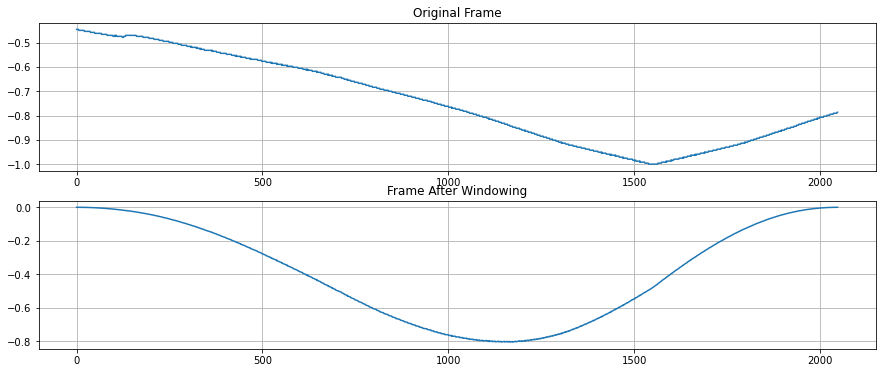

In [10]:
Temperature_win = Temperature_framed * window

ind = 3000
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(Temperature_framed[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(Temperature_win[ind])
plt.title('Frame After Windowing')
plt.grid(True)

# VISUALIZACION DE UN FRAME AL PASAR POR VENTANA


Temperature_winT = np.transpose(Temperature_win)

Temperature_fft = np.empty((int(1 + FFT_size // 2), Temperature_winT.shape[1]), dtype=np.complex64, order='F')

for n in range(Temperature_fft.shape[1]):
    Temperature_fft[:, n] = fft.fft(Temperature_winT[:, n], axis=0)[:Temperature_fft.shape[0]]

Temperature_fft = np.transpose(Temperature_fft)


(3265, 1025)


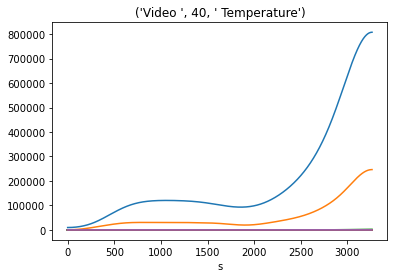

In [31]:
Temperature_power = np.square(np.abs(Temperature_fft)) # CALCULO DE LA POTENCIA DE LA SENAL
print(Temperature_power.shape)

#ts = len(Temperature_power[:])/44100.
#time = np.linspace(0,ts,len(Temperature_power[:]))
#fortitle = ('Video ',  trial+1, ' Temperature') 

plt.plot(Temperature_power)
plt.title(fortitle)
#plt.ylabel('uV')
plt.xlabel('s')
plt.show()

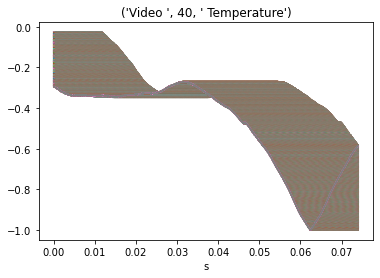

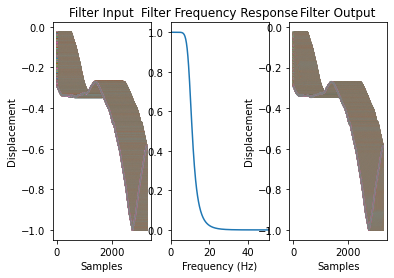

In [32]:
ts = len(Temperature_framed[:])/44100.
time = np.linspace(0,ts,len(Temperature_framed[:]))
fortitle = ('Video ',  trial+1, ' Temperature') 

plt.plot(time,Temperature_framed[:])
plt.title(fortitle)
#plt.ylabel('uV')
plt.xlabel('s')
plt.show()


buffer=Temperature_framed
#buffer_fil = scipy.signal.lfilter(b, a, buffer) # ----->>> OJO CON ESTA FUNCION lfilter
buffer_fil = scipy.signal.filtfilt(b,a,buffer)

angularFreq, response = scipy.signal.freqz(b, a)


plt.subplot(1, 3, 1)
plt.plot(buffer)
#plt.ylim(bottom=-1, top=1)
plt.title("Filter Input")
plt.xlabel("Samples")
plt.ylabel("Displacement")

# Plot output and frequency response
plt.subplot(1, 3, 2)
plt.plot(0.5 * 128 * angularFreq / np.pi, np.abs(response))
plt.xlim(0, len(Temperature) / 128)
plt.title("Filter Frequency Response")
plt.xlabel("Frequency (Hz)")

plt.subplot(1, 3, 3)
plt.plot(buffer_fil)
#plt.xlim(0, len(Temperature) / 128)
plt.title("Filter Output")
plt.xlabel("Samples")
plt.ylabel("Displacement")
    


plt.show()


[[ 1 15 12]
 [ 8  3  4]
 [ 2  6  4]]
